In [1]:
#Import dei principali pacchietti per analizzare i dati

import pandas as pd
import io
import matplotlib.pyplot as plt

# Esportazioni CBAM su GDP

Valore delle esportazioni coperte da CBAM in rapporto al valore del GDP del paese

In [3]:
#Importiamo il dataset completo

url = "https://raw.githubusercontent.com/lucasardo/cbam-thesis/refs/heads/main/datasets/CBAM%20Exports%202019.csv?token=GHSAT0AAAAAADNF6HZ6PN75X2OLSXCNDSES2IA4S6Q"
full_dataset_CBAM_trade = pd.read_csv(url)
print(full_dataset_CBAM_trade.shape)

(11, 48)


In [4]:
#Quali variabili sono presenti nel dataset?
print(full_dataset_CBAM_trade.columns)

Index(['TypeCode', 'FreqCode', 'RefPeriodId', 'RefYear', 'RefMonth', 'Period',
       'ReporterCode', 'ReporterISO', 'ReporterDesc', 'FlowCode', 'FlowDesc',
       'PartnerCode', 'PartnerISO', 'PartnerDesc', 'Partner2Code',
       'Partner2ISO', 'Partner2Desc', 'ClassificationCode',
       'ClassificationSearchCode', 'IsOriginalClassification', 'CmdCode',
       'CmdDesc', 'AggrLevel', 'IsLeaf', 'CustomsCode', 'CustomsDesc',
       'MosCode', 'MotCode', 'MotDesc', 'QtyUnitCode', 'QtyUnitAbbr', 'Qty',
       'IsQtyEstimated', 'AltQtyUnitCode', 'AltQtyUnitAbbr', 'AtlQty',
       'IsAltQtyEstimated', 'NetWgt', 'IsNetWgtEstimated', 'GrossWgt',
       'IsGrossWgtEstimated', 'Cifvalue', 'Fobvalue', 'PrimaryValue',
       'LegacyEstimationFlag', 'IsReported', 'IsAggregate', 'Unnamed: 47'],
      dtype='object')


In [5]:
# Lista delle colonne da rimuovere
columns_to_remove = ['PartnerISO', 'CmdCode',
                     'TypeCode', 'FreqCode', 'RefPeriodId', 'RefYear', 'RefMonth', 'Period',
                     'ReporterCode', 'ReporterDesc', 'FlowCode', 'FlowDesc',
                     'PartnerCode', 'PartnerDesc', 'Partner2Code',
                     'Partner2ISO', 'Partner2Desc', 'ClassificationCode',
                     'ClassificationSearchCode', 'IsOriginalClassification',
                     'CmdDesc', 'AggrLevel', 'IsLeaf', 'CustomsCode', 'CustomsDesc',
                     'MosCode', 'MotCode', 'MotDesc', 'QtyUnitCode', 'QtyUnitAbbr', 'Qty',
                     'IsQtyEstimated', 'AltQtyUnitCode', 'AltQtyUnitAbbr', 'AtlQty',
                     'IsAltQtyEstimated', 'NetWgt', 'IsNetWgtEstimated', 'GrossWgt',
                     'IsGrossWgtEstimated', 'Cifvalue', 'Fobvalue',
                     'LegacyEstimationFlag', 'IsReported', 'IsAggregate', 'Unnamed: 47']

# Rimozione delle colonne dal DataFrame
subset_CBAM_trade = full_dataset_CBAM_trade.drop(columns=columns_to_remove)

# Print del subset pulito
print(subset_CBAM_trade.columns)
print(subset_CBAM_trade.head())
print("- La dimensione di questo dataframe è:", subset_CBAM_trade.shape)


Index(['ReporterISO', 'PrimaryValue'], dtype='object')
  ReporterISO  PrimaryValue
0         JPN  5.782141e+08
1         VNM  4.398416e+08
2         NZL  4.550680e+07
3         KOR  3.310222e+09
4         MYS  5.616956e+08
- La dimensione di questo dataframe è: (11, 2)


In [6]:
# Dividiamo PrimaryValue per 1e6 e rinominiamo la variabile
subset_CBAM_trade['CBAM Value (millions)'] = subset_CBAM_trade['PrimaryValue'] / 1e6
subset_CBAM_trade = subset_CBAM_trade.drop(columns=['PrimaryValue'])

#Ordiniamoli in modo decrescente
sorted_CBAM_trade_df = subset_CBAM_trade.sort_values(by='CBAM Value (millions)', ascending=False)

print(sorted_CBAM_trade_df)

   ReporterISO  CBAM Value (millions)
9          CHN            6747.249060
3          KOR            3310.221701
0          JPN             578.214050
4          MYS             561.695623
10         IDN             462.041140
1          VNM             439.841578
5          THA             157.027243
8          SGP              66.992458
6          AUS              57.917392
2          NZL              45.506803
7          PHL               2.527645


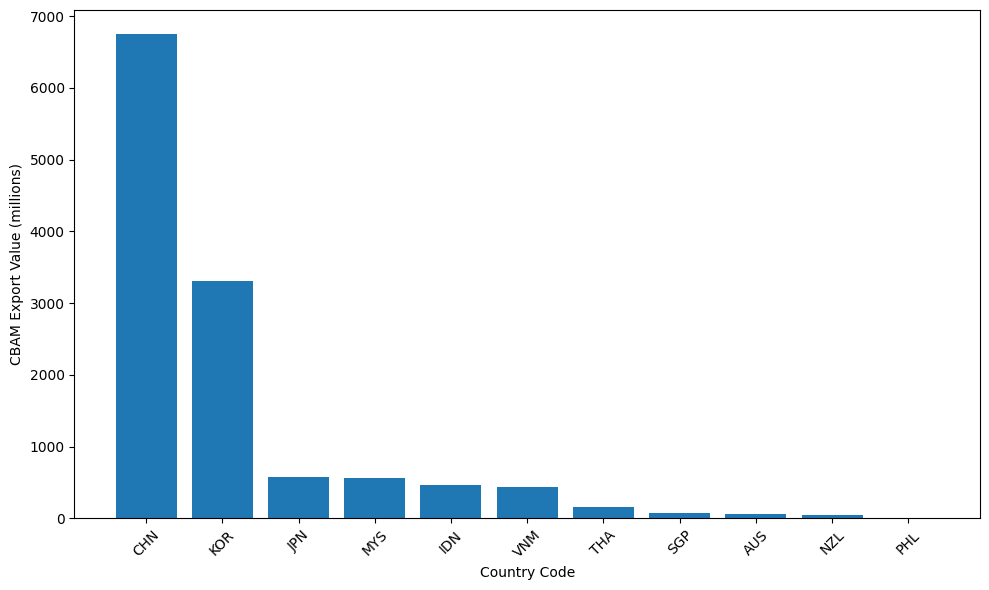

In [7]:
#Valore delle esportazioni CBAM verso la UE

plt.figure(figsize=(10, 6))
plt.bar(sorted_CBAM_trade_df['ReporterISO'], sorted_CBAM_trade_df['CBAM Value (millions)'])
plt.xlabel('Country Code')
plt.ylabel('CBAM Export Value (millions)')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [8]:
#Importiamo dataframe con GDP 2019
url = "https://raw.githubusercontent.com/lucasardo/cbam-thesis/refs/heads/main/datasets/GDP%20East%20Asia%20-%20Pacific%202019.csv?token=GHSAT0AAAAAADNF6HZ7K3JXSZHL23LJMFB22IA4T3Q"
df_gdp_2019 = pd.read_csv(url)
print(df_gdp_2019.shape)
print(df_gdp_2019.info())

(18, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Country              18 non-null     object
 1   Country Code         18 non-null     object
 2   2019 GDP (Millions)  18 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 564.0+ bytes
None


In [9]:
#Uniamo il dataset sulle esportazioni CBAM con quello sul GDP
merged_df = pd.merge(sorted_CBAM_trade_df, df_gdp_2019, left_on='ReporterISO', right_on='Country Code', how='left')
merged_df = merged_df.drop(columns=['Country', 'Country Code'])

print(merged_df)

   ReporterISO  CBAM Value (millions)  2019 GDP (Millions)
0          CHN            6747.249060             14279968
1          KOR            3310.221701              1651422
2          JPN             578.214050              5117993
3          MYS             561.695623               365177
4          IDN             462.041140              1119099
5          VNM             439.841578               334365
6          THA             157.027243               543976
7          SGP              66.992458               376837
8          AUS              57.917392              1392218
9          NZL              45.506803               213091
10         PHL               2.527645               376823


In [10]:
# Divido CBAM Value (millions) per 2019 GDP (Millions)
merged_df['ExpCBAMperGDP'] = merged_df['CBAM Value (millions)'] / merged_df['2019 GDP (Millions)']

# Oridiniamoli in modo decrescente
CBAM_GDP_df = merged_df.sort_values(by='ExpCBAMperGDP', ascending=False)
print(CBAM_GDP_df)

   ReporterISO  CBAM Value (millions)  2019 GDP (Millions)  ExpCBAMperGDP
1          KOR            3310.221701              1651422       0.002004
3          MYS             561.695623               365177       0.001538
5          VNM             439.841578               334365       0.001315
0          CHN            6747.249060             14279968       0.000472
4          IDN             462.041140              1119099       0.000413
6          THA             157.027243               543976       0.000289
9          NZL              45.506803               213091       0.000214
7          SGP              66.992458               376837       0.000178
2          JPN             578.214050              5117993       0.000113
8          AUS              57.917392              1392218       0.000042
10         PHL               2.527645               376823       0.000007


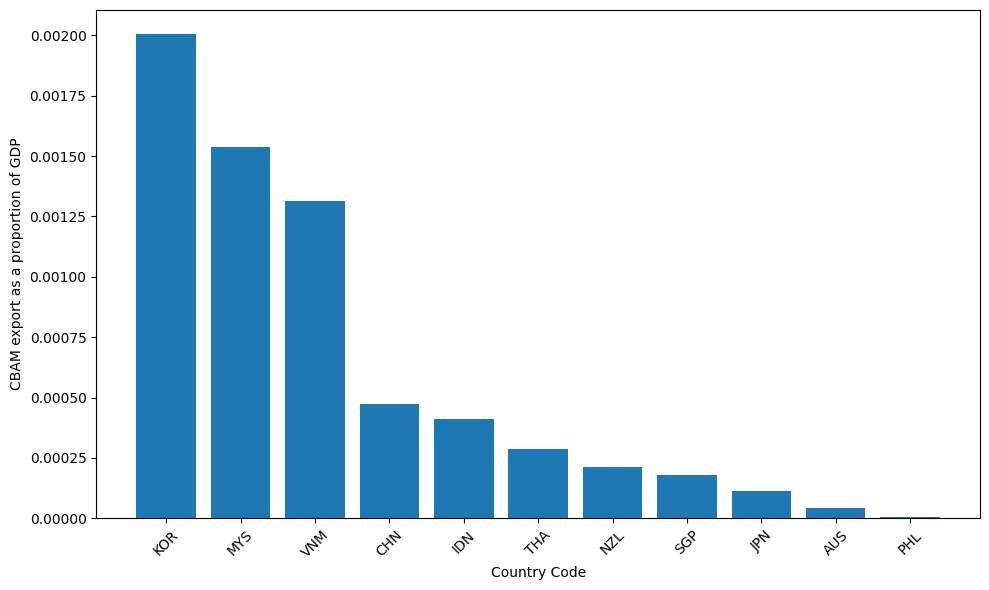

In [11]:
# Value of CBAM-covered exports as a proportion of each country's GDP
plt.figure(figsize=(10, 6))
plt.bar(CBAM_GDP_df['ReporterISO'], CBAM_GDP_df['ExpCBAMperGDP'])
plt.xlabel('Country Code')
plt.ylabel('CBAM export as a proportion of GDP')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

**Quali paesi sono più esposti, considerando le esportazioni CBAM in relazione al GDP?**

I paesi per i quali le esportazioni CBAM contribuiscono di più al GDP sono la Corea del Sud, la Malesia e il Vietnam. Pesano poco invece per Hong Kong, Australia e Filippine.



# Esportazioni CBAM su totale

Valore delle esportazioni coperte da CBAM in rapporto al valore totale delle esportazioni del paese.

In [12]:
#Importiamo dataframe con i dati sul Renewable Energy Consumption rispetto ai consumi finali di energia del 2019
url = "https://raw.githubusercontent.com/lucasardo/cbam-thesis/refs/heads/main/datasets/Total%20Exports%202019.csv?token=GHSAT0AAAAAADNF6HZ7JFGTQKBLLYGDHIAY2IA4URA"
df_tot_exp_raw = pd.read_csv(url)
print(df_tot_exp_raw.shape)

(11, 48)


In [13]:
# Lista delle colonne da rimuovere
columns_to_remove = ['PartnerISO', 'CmdCode',
                     'TypeCode', 'FreqCode', 'RefPeriodId', 'RefYear', 'RefMonth', 'Period',
                     'ReporterCode', 'ReporterDesc', 'FlowCode', 'FlowDesc',
                     'PartnerCode', 'PartnerDesc', 'Partner2Code',
                     'Partner2ISO', 'Partner2Desc', 'ClassificationCode',
                     'ClassificationSearchCode', 'IsOriginalClassification',
                     'CmdDesc', 'AggrLevel', 'IsLeaf', 'CustomsCode', 'CustomsDesc',
                     'MosCode', 'MotCode', 'MotDesc', 'QtyUnitCode', 'QtyUnitAbbr', 'Qty',
                     'IsQtyEstimated', 'AltQtyUnitCode', 'AltQtyUnitAbbr', 'AtlQty',
                     'IsAltQtyEstimated', 'NetWgt', 'IsNetWgtEstimated', 'GrossWgt',
                     'IsGrossWgtEstimated', 'Cifvalue', 'Fobvalue',
                     'LegacyEstimationFlag', 'IsReported', 'IsAggregate', 'Unnamed: 47']

# Rimozione delle colonne dal DataFrame
df_tot_exp_clean = df_tot_exp_raw.drop(columns=columns_to_remove)

# Print del subset pulito
print(df_tot_exp_clean.columns)
print(df_tot_exp_clean.head())
print("- La dimensione di questo dataframe è:", df_tot_exp_clean.shape)

Index(['ReporterISO', 'PrimaryValue'], dtype='object')
  ReporterISO  PrimaryValue
0         JPN  6.831948e+10
1         VNM  3.573216e+10
2         NZL  2.168487e+09
3         KOR  4.731775e+10
4         MYS  2.121668e+10
- La dimensione di questo dataframe è: (11, 2)


In [14]:
#Dividiamo per un milione le esportazioni totali
df_tot_exp_clean['Total Export Value (millions)'] = df_tot_exp_clean['PrimaryValue'] / 1e6
df_tot_exp = df_tot_exp_clean.drop(columns=['PrimaryValue'])
print(df_tot_exp.head())

  ReporterISO  Total Export Value (millions)
0         JPN                   68319.477525
1         VNM                   35732.164407
2         NZL                    2168.486884
3         KOR                   47317.745362
4         MYS                   21216.680025


In [15]:
#Uniamo il database sulle esportazioni totali con quello delle esportazioni CBAM
CBAM_TotExp_df_raw = pd.merge(df_tot_exp, sorted_CBAM_trade_df, left_on='ReporterISO', right_on='ReporterISO', how='left')

print(CBAM_TotExp_df_raw)

   ReporterISO  Total Export Value (millions)  CBAM Value (millions)
0          JPN                   68319.477525             578.214050
1          VNM                   35732.164407             439.841578
2          NZL                    2168.486884              45.506803
3          KOR                   47317.745362            3310.221701
4          MYS                   21216.680025             561.695623
5          THA                   18594.675810             157.027243
6          AUS                    7739.413970              57.917392
7          PHL                    7779.733656               2.527645
8          CHN                  366724.616336            6747.249060
9          IDN                   13303.003835             462.041140
10         SGP                   30538.179543              66.992458


In [16]:
#Creiamo la nuova colonna 'PctExpCBAM', ovvero la % di exp CBAM sul totale delle esportazioni
CBAM_TotExp_df_raw['PctExpCBAM'] = CBAM_TotExp_df_raw['CBAM Value (millions)'] / CBAM_TotExp_df_raw['Total Export Value (millions)']

# Oridiniamoli in modo decrescente
CBAM_TotExp_df = CBAM_TotExp_df_raw.sort_values(by='PctExpCBAM', ascending=False)
print(CBAM_TotExp_df.head())

  ReporterISO  Total Export Value (millions)  CBAM Value (millions)  \
3         KOR                   47317.745362            3310.221701   
9         IDN                   13303.003835             462.041140   
4         MYS                   21216.680025             561.695623   
2         NZL                    2168.486884              45.506803   
8         CHN                  366724.616336            6747.249060   

   PctExpCBAM  
3    0.069957  
9    0.034732  
4    0.026474  
2    0.020986  
8    0.018399  


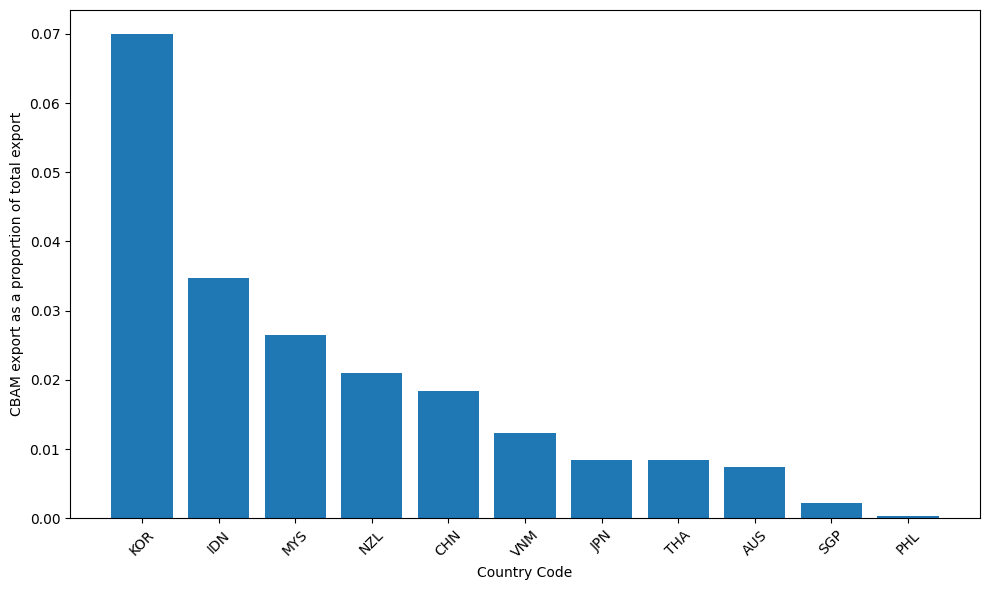

In [17]:
# CBAM export as a proportion of total export
plt.figure(figsize=(10, 6))
plt.bar(CBAM_TotExp_df['ReporterISO'], CBAM_TotExp_df['PctExpCBAM'])
plt.xlabel('Country Code')
plt.ylabel('CBAM export as a proportion of total export')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

**Quali paesi sono più vulnerabili, considerando le esportazioni coperte da CBAM sul totale delle esportazioni?**

La Corea del Sud presenta un rischio alto, le esportazioni CBAM sono circa il 6‰ delle esportazioni totali. Al contrario, per paesi come Singapore, Hong Kong e Filippine rappresentano meno dell'1‰.



In [18]:
#Uniamolo al dataset sulle esportazioni
rec_trade_df_raw = pd.merge(CBAM_TotExp_df, CBAM_GDP_df, left_on='ReporterISO', right_on='ReporterISO', how='left')
two_dim = rec_trade_df_raw.drop(columns=['Total Export Value (millions)', 'CBAM Value (millions)_x', '2019 GDP (Millions)', 'CBAM Value (millions)_y'])

two_dim = two_dim.sort_values(by='PctExpCBAM', ascending=True)
print(two_dim)

   ReporterISO  PctExpCBAM  ExpCBAMperGDP
10         PHL    0.000325       0.000007
9          SGP    0.002194       0.000178
8          AUS    0.007483       0.000042
7          THA    0.008445       0.000289
6          JPN    0.008463       0.000113
5          VNM    0.012309       0.001315
4          CHN    0.018399       0.000472
3          NZL    0.020986       0.000214
2          MYS    0.026474       0.001538
1          IDN    0.034732       0.000413
0          KOR    0.069957       0.002004


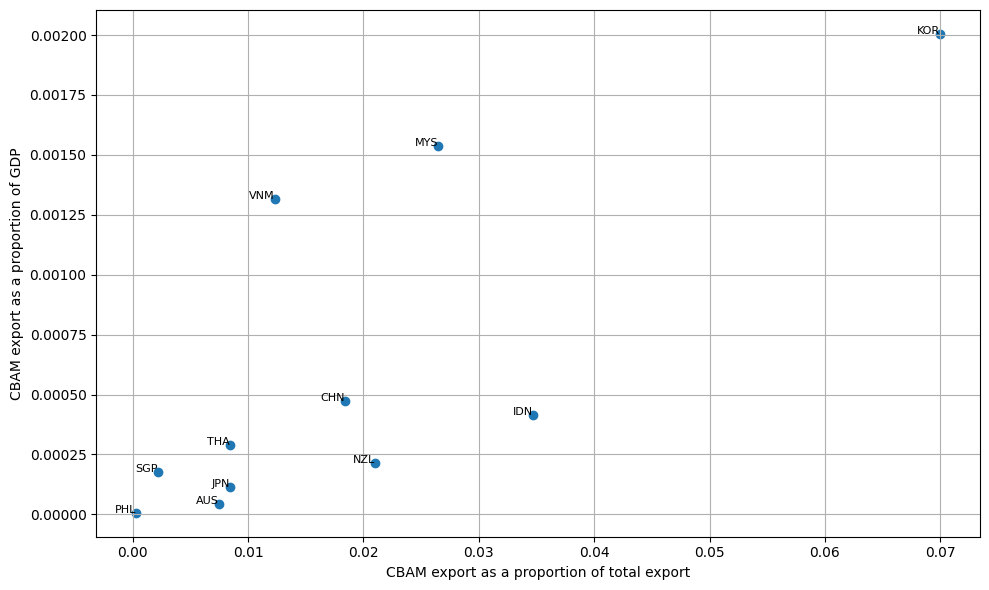

In [19]:
#Plottiamo i dati su PctExpCBAM e ExpCBAMperGDP

plt.figure(figsize=(10, 6))
plt.scatter(two_dim['PctExpCBAM'], two_dim['ExpCBAMperGDP'])
plt.xlabel('CBAM export as a proportion of total export')
plt.ylabel('CBAM export as a proportion of GDP')
plt.grid(True)

# Add country names as text labels
for i, row in two_dim.iterrows():
    plt.text(row['PctExpCBAM'], row['ExpCBAMperGDP'], row['ReporterISO'], fontsize=8, ha='right')

plt.tight_layout()

plt.show()

# Carbon Intensity of electricity

This measures the amount of carbon dioxide emitted per unit of electricity production.

In [20]:
#Importiamo dataframe con i dati sul Renewable Energy Consumption rispetto ai consumi finali di energia del 2019
url = "https://raw.githubusercontent.com/lucasardo/cbam-thesis/refs/heads/main/datasets/Carbon%20Intensity.csv?token=GHSAT0AAAAAADNF6HZ6HSDYURGOE4LRQOL42IA4VGA"
df_ren = pd.read_csv(url)
print(df_ren.shape)

(11, 3)


In [21]:
#Quali variabili sono presenti nel dataset?
print(df_ren.columns)
print("- La dimensione di questo dataframe è:", df_ren.shape)

Index(['Country Name', 'Country Code', 'Carbon Intensity [gCO2e]'], dtype='object')
- La dimensione di questo dataframe è: (11, 3)


In [22]:
#Rinominiamo la colonna 2019 in Carbon Intensity, ovvero Renewable Energy Consumption del 2019
df_ren.rename(columns={'Carbon Intensity [gCO2e]': 'Carbon_Intensity'}, inplace=True)
print(df_ren.head())

# Esaminiamo le statistiche descrittive della variabile Carbon Intensity
print("STATISTICHE Carbon Intensity")
df_ren.describe()

#Ordiniamoli
ci_df = df_ren.sort_values(by='Carbon_Intensity', ascending=False)
print(ci_df)

  Country Name Country Code  Carbon_Intensity
0    Australia          AUS               503
1        Korea          KOR               436
2        Japan          JPN               483
3  New Zealand          NZL                98
4     Thailand          THA               502
STATISTICHE Carbon Intensity
   Country Name Country Code  Carbon_Intensity
7     Indonesia          IDN               619
5   Philippines          PHL               582
8      Malaysia          MYS               544
10        China          CHN               531
0     Australia          AUS               503
4      Thailand          THA               502
6     Singapore          SGP               489
2         Japan          JPN               483
1         Korea          KOR               436
9       Vietnam          VNM               377
3   New Zealand          NZL                98


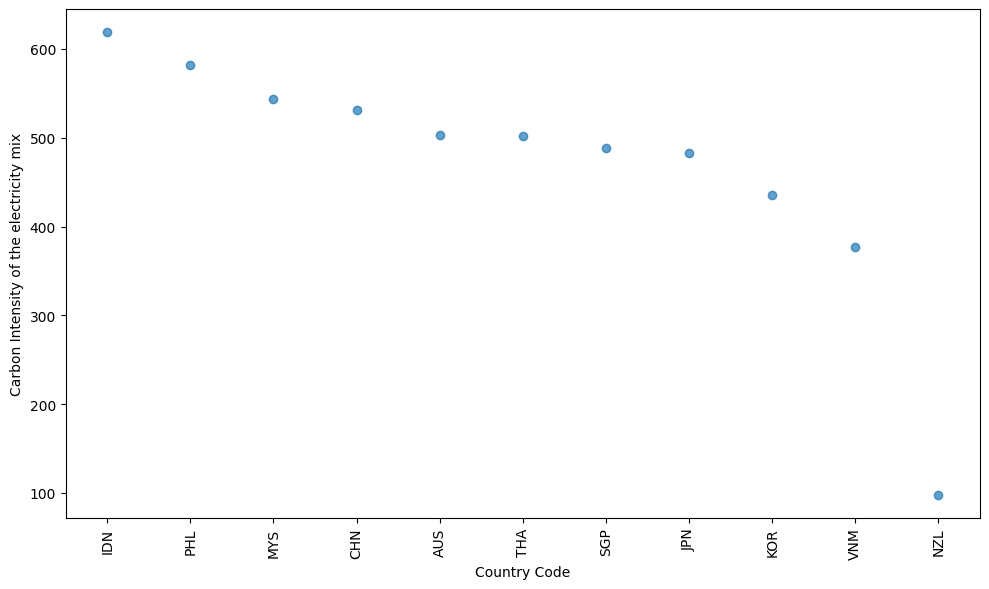

In [23]:
#Visualizziamo in un grafico la variabile Carbon Intensity

plt.figure(figsize=(10, 6))  # Set the size of the plot
plt.scatter(ci_df['Country Code'], ci_df['Carbon_Intensity'], alpha=0.7)  # Create a scatter plot
plt.xlabel('Country Code')  # Set the x-axis label
plt.ylabel('Carbon Intensity of the electricity mix')  # Set the y-axis label
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust spacing
plt.show()  # Display the plot

In [24]:
#Uniamolo al dataset sulle esportazioni
three_dim_raw = pd.merge(ci_df, two_dim, left_on='Country Code', right_on='ReporterISO', how='left')
three_dim = three_dim_raw.drop(columns=['ReporterISO'])

print(three_dim)

   Country Name Country Code  Carbon_Intensity  PctExpCBAM  ExpCBAMperGDP
0     Indonesia          IDN               619    0.034732       0.000413
1   Philippines          PHL               582    0.000325       0.000007
2      Malaysia          MYS               544    0.026474       0.001538
3         China          CHN               531    0.018399       0.000472
4     Australia          AUS               503    0.007483       0.000042
5      Thailand          THA               502    0.008445       0.000289
6     Singapore          SGP               489    0.002194       0.000178
7         Japan          JPN               483    0.008463       0.000113
8         Korea          KOR               436    0.069957       0.002004
9       Vietnam          VNM               377    0.012309       0.001315
10  New Zealand          NZL                98    0.020986       0.000214


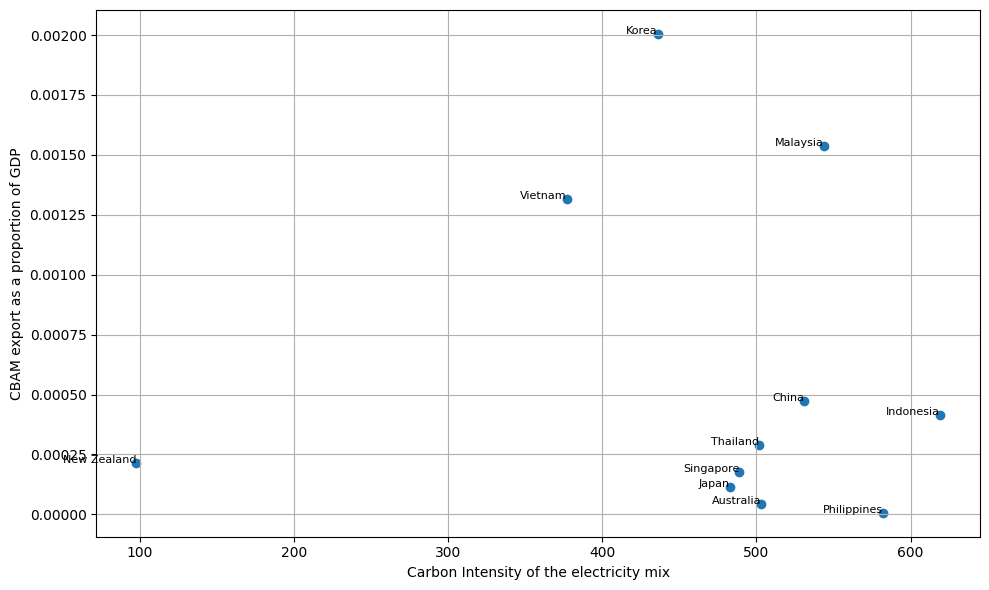

In [25]:
#Plottiamo i dati su Carbon Intensity e ExpCBAMperGDP

plt.figure(figsize=(10, 6))
plt.scatter(three_dim['Carbon_Intensity'], three_dim['ExpCBAMperGDP'])
plt.xlabel('Carbon Intensity of the electricity mix')
plt.ylabel('CBAM export as a proportion of GDP')
plt.grid(True)

# Add country names as text labels
for i, row in three_dim.iterrows():
    plt.text(row['Carbon_Intensity'], row['ExpCBAMperGDP'], row['Country Name'], fontsize=8, ha='right')

plt.tight_layout()

plt.show()

**Come si combinano variabili sull'esposizione e sulla vulnerabilità?**

La Korea e la Malesia presenta un rischio alto, dovuto alla bassa diffusione di energie rinnovabili e alta esposizione al mercato UE. Il Vietnam presenta un rischio medio, dovuto all'esposizione significativa bilanciata però dalla maggiore diffusione di energiue rinnovabili. Infine, Nuova Zelanda, Filippine e Thailandia presentano un rischio basso, grazie all'alta diffusione energie rinnovabili e alla bassa esposizione alle esportazioni CBAM.

# Database su capacità statistica

SPI score. Indice di performance statistica, che si concentra su cinque dimensioni : uso dei dati, servizi di dati, prodotti di dati, fonti di dati e infrastruttura di dati.

In [27]:
#Importiamo dataframe con i dati sul Renewable Energy Consumption rispetto ai consumi finali di energia del 2019
url = "https://raw.githubusercontent.com/lucasardo/cbam-thesis/refs/heads/main/datasets/Statistical%20Performance%20Indicator.csv?token=GHSAT0AAAAAADNF6HZ7JDHACWXH6S5RH4XY2IA4VYQ"
df_spi_raw = pd.read_csv(url)
print(df_spi_raw.shape)

(11, 5)


In [28]:
#QUali variabili sono presenti nel dataset?
print(df_spi_raw.columns)

Index(['Series Name', 'Series Code', 'Country Name', 'Country Code',
       '2019 [YR2019]'],
      dtype='object')


In [29]:
SPI_df = df_spi_raw.drop(columns=['Country Name', 'Series Name', 'Series Code'])
SPI_df.rename(columns={'2019 [YR2019]': 'SPI_Score'}, inplace=True)
SPI_df = SPI_df.sort_values(by='SPI_Score', ascending=False)


print(SPI_df.head())

  Country Code  SPI_Score
3          KOR  88.283750
4          AUS  88.241667
2          JPN  85.809167
8          NZL  85.263750
9          THA  76.110833


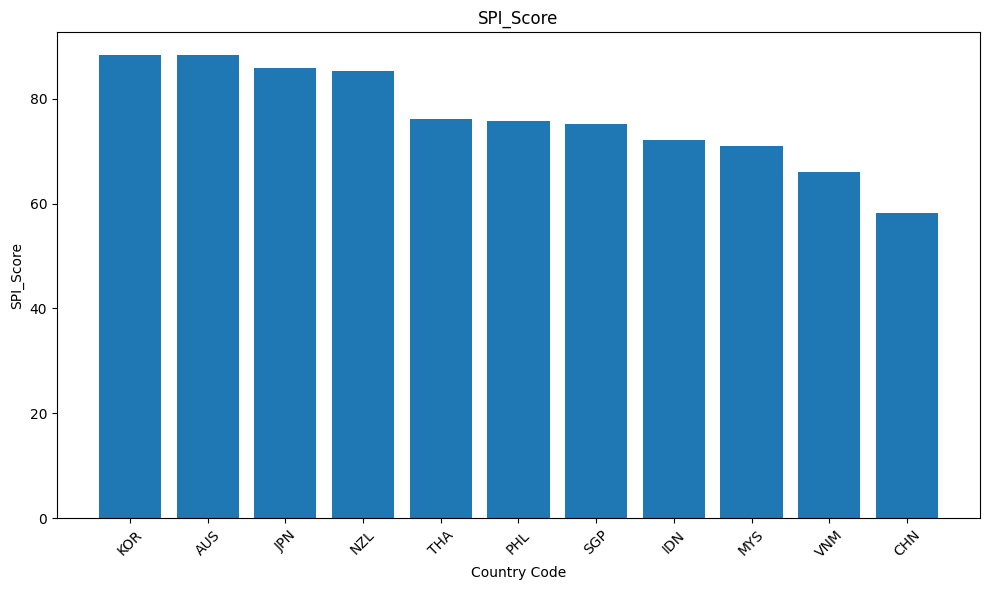

In [30]:
# SPI_Score
plt.figure(figsize=(10, 6))
plt.bar(SPI_df['Country Code'], SPI_df['SPI_Score'])
plt.xlabel('Country Code')
plt.ylabel('SPI_Score')
plt.title('SPI_Score')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

In [31]:
#Uniamolo al dataset sulle esportazioni
four_dim = pd.merge(three_dim, SPI_df, left_on='Country Code', right_on='Country Code', how='left')

print(four_dim)

   Country Name Country Code  Carbon_Intensity  PctExpCBAM  ExpCBAMperGDP  \
0     Indonesia          IDN               619    0.034732       0.000413   
1   Philippines          PHL               582    0.000325       0.000007   
2      Malaysia          MYS               544    0.026474       0.001538   
3         China          CHN               531    0.018399       0.000472   
4     Australia          AUS               503    0.007483       0.000042   
5      Thailand          THA               502    0.008445       0.000289   
6     Singapore          SGP               489    0.002194       0.000178   
7         Japan          JPN               483    0.008463       0.000113   
8         Korea          KOR               436    0.069957       0.002004   
9       Vietnam          VNM               377    0.012309       0.001315   
10  New Zealand          NZL                98    0.020986       0.000214   

    SPI_Score  
0   72.202500  
1   75.723333  
2   71.050417  
3   58.2183

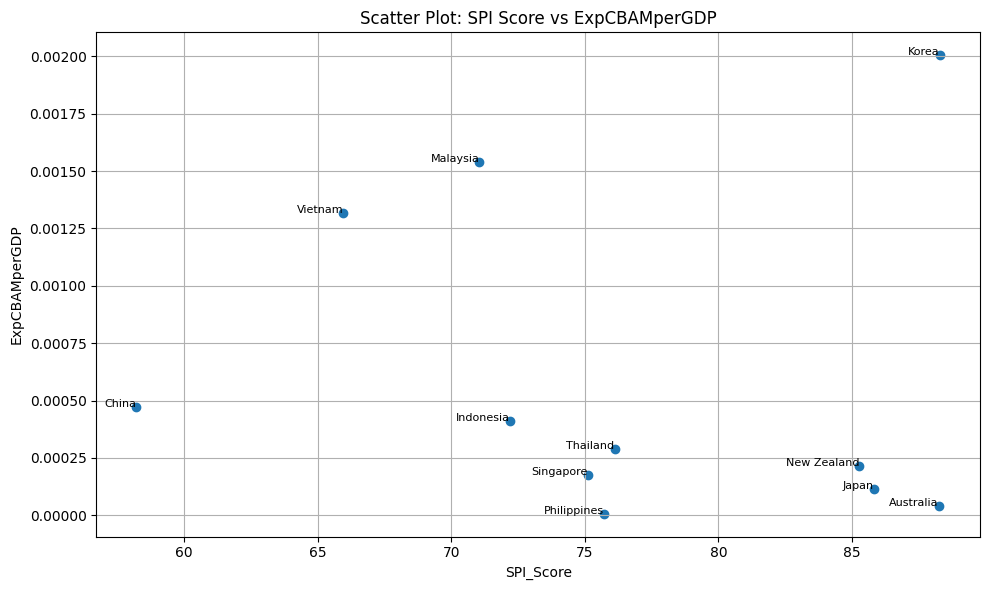

In [32]:
#Plottiamo i dati su SPI_Score e ExpCBAMperGDP

plt.figure(figsize=(10, 6))
plt.scatter(four_dim['SPI_Score'], four_dim['ExpCBAMperGDP'])
plt.xlabel('SPI_Score')
plt.ylabel('ExpCBAMperGDP')
plt.title('Scatter Plot: SPI Score vs ExpCBAMperGDP')
plt.grid(True)

# Add country names as text labels
for i, row in four_dim.iterrows():
    plt.text(row['SPI_Score'], row['ExpCBAMperGDP'], row['Country Name'], fontsize=8, ha='right')

plt.tight_layout()

plt.show()

**Come si combinano le variabili sulla capacità statistica
e sull'esposizione?**

La Korea ha un rischio medio, dovuto all'alta esposizione, bilanciata però da una alta capacità statistica. Australia, Giappone e Nuova Zelanda presentano un rischio basso, dovuto alla bassa esposizione e alla alta capacità statistica. Infine, Malesia e Vietnam presentano un rischio medio-alto, dovuto all'esposizione considerevole e alla medio-bassa capacità statistica.

# Database su capacità d'innovazione

Numero di brevetti registrati in ogni paese per 100.000 abitanti

In [33]:
#Importiamo dataframe con i dati sulla capacità d'innovazione
url = "https://raw.githubusercontent.com/lucasardo/cbam-thesis/refs/heads/main/datasets/Total%20patent%20applications.csv?token=GHSAT0AAAAAADNF6HZ6SANVKVUNQ5ME53LC2IA4WNQ"
df_pat_raw = pd.read_csv(url)
print(df_pat_raw.shape)

(11, 31)


In [34]:
#QUali variabili sono presenti nel dataset?
print(df_pat_raw.columns)

Index(['Office', 'Office (Code)', 'Origin', 'Type', '1995', '1996', '1997',
       '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')


In [35]:
# Slice the DataFrame to select the columns containing the yearly values
yearly_columns = df_pat_raw.columns[4:29]  # Assuming the yearly columns start from the 5th column

# Create a new column 'TotalPat_2019' that sums up the yearly values for each observation
df_pat_raw['TotalPat_2019'] = df_pat_raw[yearly_columns].sum(axis=1)

# Print the updated DataFrame
print(df_pat_raw)

         Office Office (Code) Origin   Type    1995    1996    1997    1998  \
0     Australia           AUS  Total  Total   14061   15018   17158   17925   
1         China           CHN  Total  Total   18699   22742   24774   47396   
2     Indonesia           IDN  Total  Total    2874    3997    4018    1846   
3         Japan           JPN  Total  Total  369215  376615  391572  401932   
4      Malaysia           MYS  Total  Total    4052    5575    6451    5963   
5   New Zealand           NZL  Total  Total    4719    7467    9831    5700   
6   Philippines           PHL  Total  Total    2376    2797    3565    3443   
7         Korea           KOR  Total  Total   78499   90326   92684   75233   
8     Singapore           SGP  Total  Total    2557   12581    6336    6678   
9      Thailand           THA  Total  Total    3532    4558    5394    5071   
10      Vietnam           VNM  Total  Total     682     966    1264    1105   

      1999    2000  ...    2013    2014     2015   

In [36]:
#Rimuoviamo gli anni singoli
years_to_drop = [str(year) for year in range(1995, 2022)]
df_pat_clean = df_pat_raw.drop(columns=years_to_drop)

#RImuoviamo le ultime colonne inutili e rinominiamo quella dei Country Code e Country Name
df_pat_clean = df_pat_clean.drop(columns=['Origin', 'Type'])
df_pat_clean.rename(columns={'Office (Code)': 'Country Code'}, inplace=True)
df_pat_clean.rename(columns={'Office': 'Country Name'}, inplace=True)

print(df_pat_clean)

   Country Name Country Code  TotalPat_2019
0     Australia          AUS       600479.0
1         China          CHN     11916678.0
2     Indonesia          IDN       134262.0
3         Japan          JPN      9311436.0
4      Malaysia          MYS       151464.0
5   New Zealand          NZL       170401.0
6   Philippines          PHL        78903.0
7         Korea          KOR      3831729.0
8     Singapore          SGP       230487.0
9      Thailand          THA       149236.0
10      Vietnam          VNM        73161.0


In [38]:
#Importiamo il dataset sulla popolazione (dati del 2019)

url = "https://raw.githubusercontent.com/lucasardo/cbam-thesis/refs/heads/main/datasets/Population%202019.csv?token=GHSAT0AAAAAADNF6HZ75TKLD2A3GMDLDLHI2IA4XCQ"
df_pop = pd.read_csv(url)
print(df_pop.head())

        Series Name  Series Code Country Name Country Code  2019 [YR2019]
0  Population total  SP.POP.TOTL    Australia          AUS       25340217
1  Population total  SP.POP.TOTL        Korea          KOR       51764822
2  Population total  SP.POP.TOTL        Japan          JPN      126633000
3  Population total  SP.POP.TOTL  New Zealand          NZL        4979200
4  Population total  SP.POP.TOTL     Thailand          THA       71307763


In [39]:
#Rimuoviamo le colonne inutili e rinominiamo quella con i valori della popolazione
df_pop = df_pop.drop(columns=['Series Name', 'Series Code', 'Country Name'])
df_pop.rename(columns={'2019 [YR2019]': 'Population_2019'}, inplace=True)

#Dividiamo la colonna Population per 1e5, così da averla in centinaia di migliaia
df_pop['Population (Hundreds of Thousands)'] = df_pop['Population_2019'] / 1e5

print(df_pop.head())

  Country Code  Population_2019  Population (Hundreds of Thousands)
0          AUS         25340217                           253.40217
1          KOR         51764822                           517.64822
2          JPN        126633000                          1266.33000
3          NZL          4979200                            49.79200
4          THA         71307763                           713.07763


In [40]:
#Rimuoviamo la colonna Population_2019
df_pop = df_pop.drop(columns=['Population_2019'])

#Uniamo il dataset sui brevetti con quello sulla popolazione
pat_pop_df = pd.merge(df_pat_clean, df_pop, left_on='Country Code', right_on='Country Code', how='left')
pat_pop_df = pat_pop_df.drop(columns=['Country Name'])

print(pat_pop_df)

   Country Code  TotalPat_2019  Population (Hundreds of Thousands)
0           AUS       600479.0                           253.40217
1           CHN     11916678.0                         14077.45000
2           IDN       134262.0                          2695.82878
3           JPN      9311436.0                          1266.33000
4           MYS       151464.0                           328.04020
5           NZL       170401.0                            49.79200
6           PHL        78903.0                          1103.80804
7           KOR      3831729.0                           517.64822
8           SGP       230487.0                            57.03569
9           THA       149236.0                           713.07763
10          VNM        73161.0                           957.76716


In [41]:
#Creiamo la nuova colonna 'PatPerCap', ovvero il numero di brevetti per 100.000 abitanti
pat_pop_df['PatPerCap'] = pat_pop_df['TotalPat_2019'] / pat_pop_df['Population (Hundreds of Thousands)']

#Rimuoviamo le colonne inutili
pat_pop_df = pat_pop_df.drop(columns=['TotalPat_2019', 'Population (Hundreds of Thousands)'])

# Oridiniamoli in modo decrescente
pat_pop_df = pat_pop_df.sort_values(by='PatPerCap', ascending=False)
print(pat_pop_df)

   Country Code    PatPerCap
7           KOR  7402.187146
3           JPN  7353.088058
8           SGP  4041.101282
5           NZL  3422.256587
0           AUS  2369.667947
1           CHN   846.508281
4           MYS   461.723898
9           THA   209.284366
10          VNM    76.387042
6           PHL    71.482538
2           IDN    49.803608


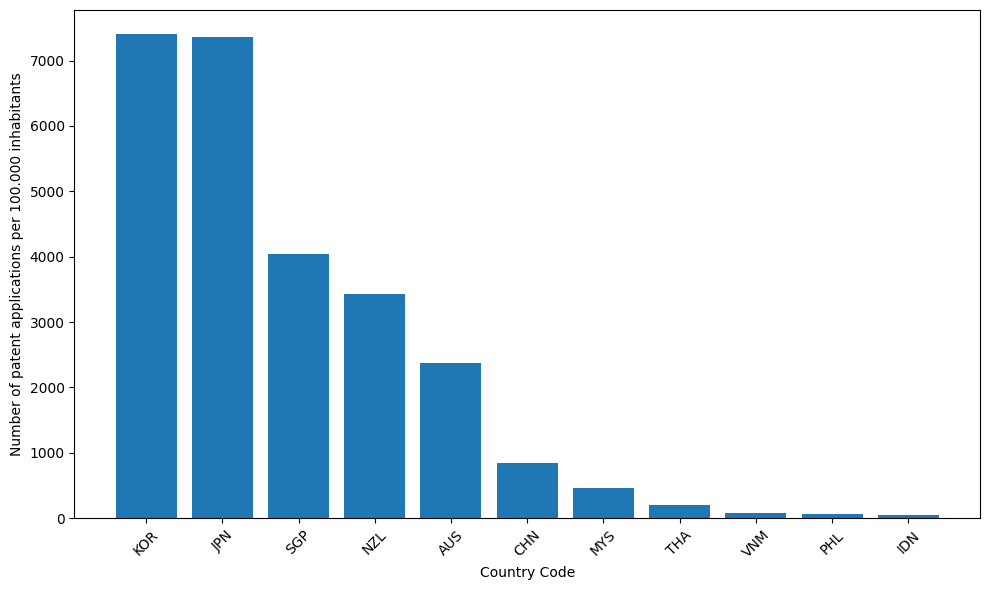

In [42]:
# PatPerCap
plt.figure(figsize=(10, 6))
plt.bar(pat_pop_df['Country Code'], pat_pop_df['PatPerCap'])
plt.xlabel('Country Code')
plt.ylabel('Number of patent applications per 100.000 inhabitants')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

In [43]:
#Uniamolo al dataset complessivo
five_dim = pd.merge(four_dim, pat_pop_df, left_on='Country Code', right_on='Country Code', how='left')

print(five_dim)

   Country Name Country Code  Carbon_Intensity  PctExpCBAM  ExpCBAMperGDP  \
0     Indonesia          IDN               619    0.034732       0.000413   
1   Philippines          PHL               582    0.000325       0.000007   
2      Malaysia          MYS               544    0.026474       0.001538   
3         China          CHN               531    0.018399       0.000472   
4     Australia          AUS               503    0.007483       0.000042   
5      Thailand          THA               502    0.008445       0.000289   
6     Singapore          SGP               489    0.002194       0.000178   
7         Japan          JPN               483    0.008463       0.000113   
8         Korea          KOR               436    0.069957       0.002004   
9       Vietnam          VNM               377    0.012309       0.001315   
10  New Zealand          NZL                98    0.020986       0.000214   

    SPI_Score    PatPerCap  
0   72.202500    49.803608  
1   75.723333    

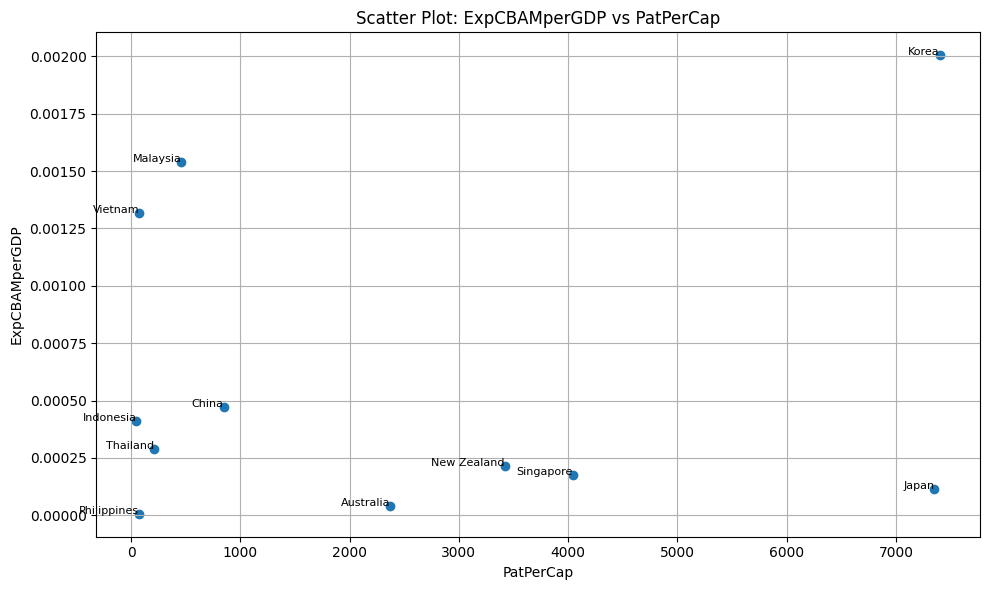

In [44]:
#Plottiamo i dati su ExpCBAMperGDP e PatPerCap

plt.figure(figsize=(10, 6))
plt.scatter(five_dim['PatPerCap'], five_dim['ExpCBAMperGDP'])
plt.xlabel('PatPerCap')
plt.ylabel('ExpCBAMperGDP')
plt.title('Scatter Plot: ExpCBAMperGDP vs PatPerCap')
plt.grid(True)

# Add country names as text labels
for i, row in five_dim.iterrows():
    plt.text(row['PatPerCap'], row['ExpCBAMperGDP'], row['Country Name'], fontsize=8, ha='right')

plt.tight_layout()

plt.show()

**Come si combinano le variabili sull'innovazione
e sull'esposizione?**

La Korea ha un rischio medio, dovuto all'alta esposizione, bilanciata però da una alta capacità di innovazione. Il Giappone presenta un rischio basso, dovuto alla bassa esposizione e alla alta capacità di innovazione. Infine, Malesia e Vietnam presentano un rischio medio-alto, dovuto all'esposizione considerevole e alla medio-bassa capacità di innovazione.

# Database su trade elasticities

Trade elasticities

In [45]:
#Importiamo dataframe con i dati sulle trade elasticities
url = "https://raw.githubusercontent.com/lucasardo/cbam-thesis/refs/heads/main/datasets/Trade%20elasticities.csv?token=GHSAT0AAAAAADNF6HZ7HFAGNPB4PX2WZUAC2IA4XQA"
df_trade_el_raw = pd.read_csv(url)
print(df_trade_el_raw.shape)

(11, 2)


In [46]:
df_trade_el_raw.rename(columns={'TE': 'Trade_Elast'}, inplace=True)

df_te = df_trade_el_raw.sort_values(by='Trade_Elast', ascending=False)
print(df_te)

   Country Code  Trade_Elast
3           NZL        2.536
2           JPN        2.010
0           AUS        1.331
1           KOR        1.285
6           SGP        1.070
7           IDN        0.889
9           VNM        0.849
5           PHL        0.783
8           MYS        0.736
10          CHN        0.554
4           THA        0.490


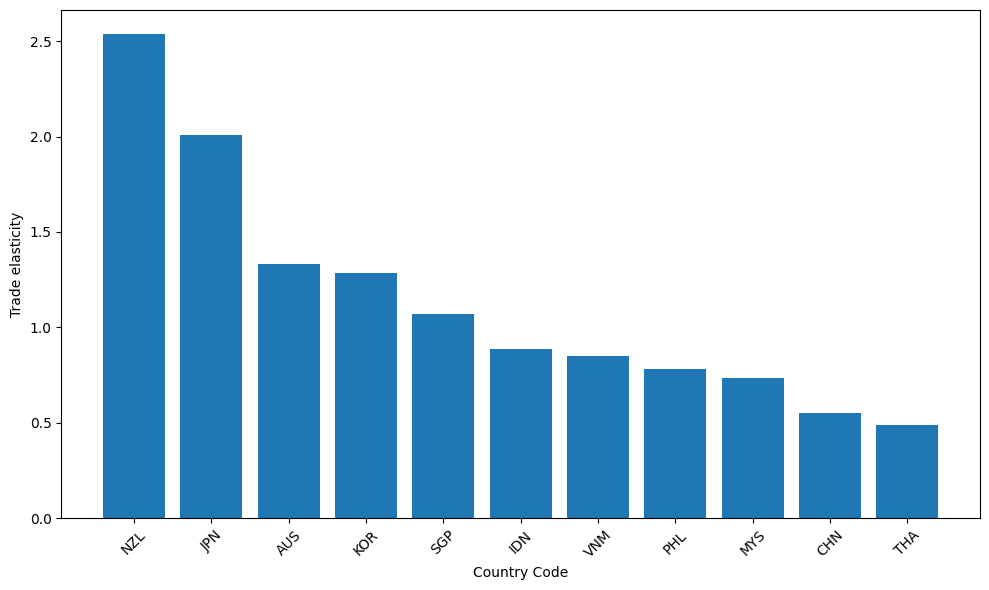

In [47]:
# Trade_Elast
plt.figure(figsize=(10, 6))
plt.bar(df_te['Country Code'], df_te['Trade_Elast'])
plt.xlabel('Country Code')
plt.ylabel('Trade elasticity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

In [48]:
#Uniamolo al dataset complessivo
six_dim = pd.merge(five_dim, df_te, left_on='Country Code', right_on='Country Code', how='left')

print(six_dim)

   Country Name Country Code  Carbon_Intensity  PctExpCBAM  ExpCBAMperGDP  \
0     Indonesia          IDN               619    0.034732       0.000413   
1   Philippines          PHL               582    0.000325       0.000007   
2      Malaysia          MYS               544    0.026474       0.001538   
3         China          CHN               531    0.018399       0.000472   
4     Australia          AUS               503    0.007483       0.000042   
5      Thailand          THA               502    0.008445       0.000289   
6     Singapore          SGP               489    0.002194       0.000178   
7         Japan          JPN               483    0.008463       0.000113   
8         Korea          KOR               436    0.069957       0.002004   
9       Vietnam          VNM               377    0.012309       0.001315   
10  New Zealand          NZL                98    0.020986       0.000214   

    SPI_Score    PatPerCap  Trade_Elast  
0   72.202500    49.803608       

In [49]:
six_dim.to_excel('dataframe cbam.xlsx', index=False)


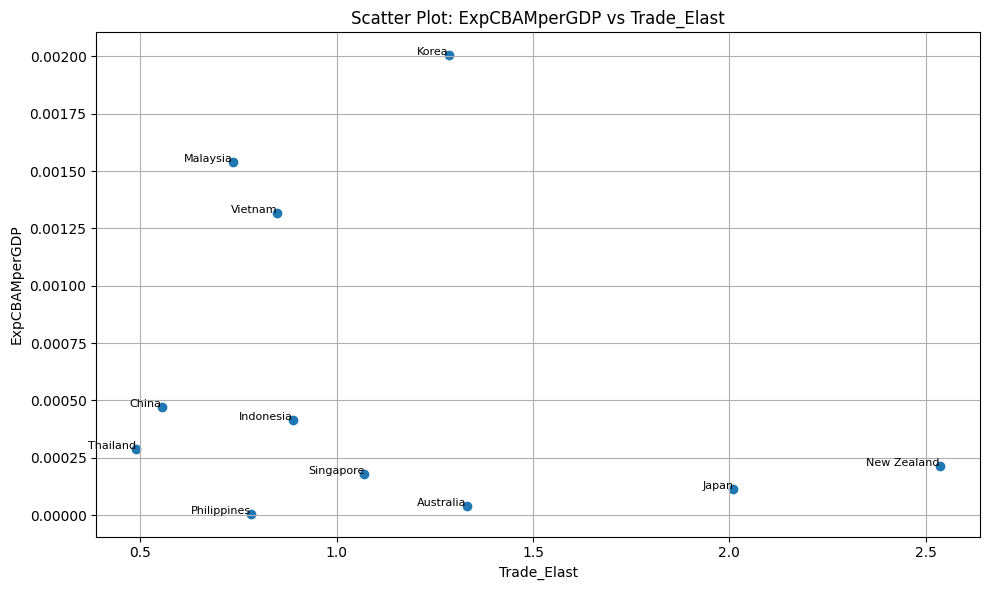

In [50]:
#Plottiamo i dati su ExpCBAMperGDP e Trade_Elast

plt.figure(figsize=(10, 6))
plt.scatter(six_dim['Trade_Elast'], six_dim['ExpCBAMperGDP'])
plt.xlabel('Trade_Elast')
plt.ylabel('ExpCBAMperGDP')
plt.title('Scatter Plot: ExpCBAMperGDP vs Trade_Elast')
plt.grid(True)

# Add country names as text labels
for i, row in six_dim.iterrows():
    plt.text(row['Trade_Elast'], row['ExpCBAMperGDP'], row['Country Name'], fontsize=8, ha='right')

plt.tight_layout()

plt.show()

# Normalizzazione e aggregazione

In [51]:
from sklearn.preprocessing import MinMaxScaler

# Colonne da normalizzare
columns_to_normalize = ['Carbon_Intensity', 'PctExpCBAM', 'ExpCBAMperGDP', 'SPI_Score', 'PatPerCap', 'Trade_Elast']

scaler = MinMaxScaler()
six_dim[columns_to_normalize] = scaler.fit_transform(six_dim[columns_to_normalize])

# Now, the values in the specified columns are normalized to the range [0, 1]
print(six_dim)

   Country Name Country Code  Carbon_Intensity  PctExpCBAM  ExpCBAMperGDP  \
0     Indonesia          IDN          1.000000    0.494126       0.203308   
1   Philippines          PHL          0.928983    0.000000       0.000000   
2      Malaysia          MYS          0.856046    0.375534       0.766578   
3         China          CHN          0.831094    0.259560       0.233156   
4     Australia          AUS          0.777351    0.102805       0.017466   
5      Thailand          THA          0.775432    0.116610       0.141137   
6     Singapore          SGP          0.750480    0.026838       0.085630   
7         Japan          JPN          0.738964    0.116878       0.053194   
8         Korea          KOR          0.648752    1.000000       1.000000   
9       Vietnam          VNM          0.535509    0.172111       0.655107   
10  New Zealand          NZL          0.000000    0.296710       0.103540   

    SPI_Score  PatPerCap  Trade_Elast  
0    0.465125   0.000000     0.1950

In [52]:
# Prendiamo il complemento a uno delle seguenti due colonne: in questo modo, all'aumentare dei valori di ogni variabile
# corrisponde un aumento della vulnerabilità
six_dim['SPI_Score_Compl'] = 1 - six_dim['SPI_Score']
six_dim['PatPerCap_Compl'] = 2 - six_dim['PatPerCap'] - 1

# Drop PctExpCBAM e ExpCBAMperGDP
six_dim = six_dim.drop(columns=['SPI_Score', 'PatPerCap'])

print(six_dim)

   Country Name Country Code  Carbon_Intensity  PctExpCBAM  ExpCBAMperGDP  \
0     Indonesia          IDN          1.000000    0.494126       0.203308   
1   Philippines          PHL          0.928983    0.000000       0.000000   
2      Malaysia          MYS          0.856046    0.375534       0.766578   
3         China          CHN          0.831094    0.259560       0.233156   
4     Australia          AUS          0.777351    0.102805       0.017466   
5      Thailand          THA          0.775432    0.116610       0.141137   
6     Singapore          SGP          0.750480    0.026838       0.085630   
7         Japan          JPN          0.738964    0.116878       0.053194   
8         Korea          KOR          0.648752    1.000000       1.000000   
9       Vietnam          VNM          0.535509    0.172111       0.655107   
10  New Zealand          NZL          0.000000    0.296710       0.103540   

    Trade_Elast  SPI_Score_Compl  PatPerCap_Compl  
0      0.195015        

In [53]:
# Ipotizziamo di assegnare un peso del 30% alla variabile ExpCBAMperGDP
weights_1 = {'ExpCBAMperGDP': 0.30, 'PctExpCBAM': 0.14, 'Trade_Elast': 0.14, 'Carbon_Intensity': 0.14, 'SPI_Score_Compl': 0.14, 'PatPerCap_Compl':0.14, }

# Calculate the weighted sum
six_dim['WeightedSum_1'] = six_dim.apply(lambda row: sum(row[col] * weights_1 for col, weights_1 in weights_1.items()), axis=1)

# Sort the values
six_dim_sorted = six_dim.sort_values(by='WeightedSum_1', ascending=False)

# Now, df['WeightedSum'] contains the weighted sum for each observation
print(six_dim_sorted)

   Country Name Country Code  Carbon_Intensity  PctExpCBAM  ExpCBAMperGDP  \
2      Malaysia          MYS          0.856046    0.375534       0.766578   
8         Korea          KOR          0.648752    1.000000       1.000000   
9       Vietnam          VNM          0.535509    0.172111       0.655107   
0     Indonesia          IDN          1.000000    0.494126       0.203308   
3         China          CHN          0.831094    0.259560       0.233156   
5      Thailand          THA          0.775432    0.116610       0.141137   
1   Philippines          PHL          0.928983    0.000000       0.000000   
10  New Zealand          NZL          0.000000    0.296710       0.103540   
6     Singapore          SGP          0.750480    0.026838       0.085630   
4     Australia          AUS          0.777351    0.102805       0.017466   
7         Japan          JPN          0.738964    0.116878       0.053194   

    Trade_Elast  SPI_Score_Compl  PatPerCap_Compl  WeightedSum_1  
2      0

In [54]:
six_dim.to_excel('weighted sum.xlsx', index=False)

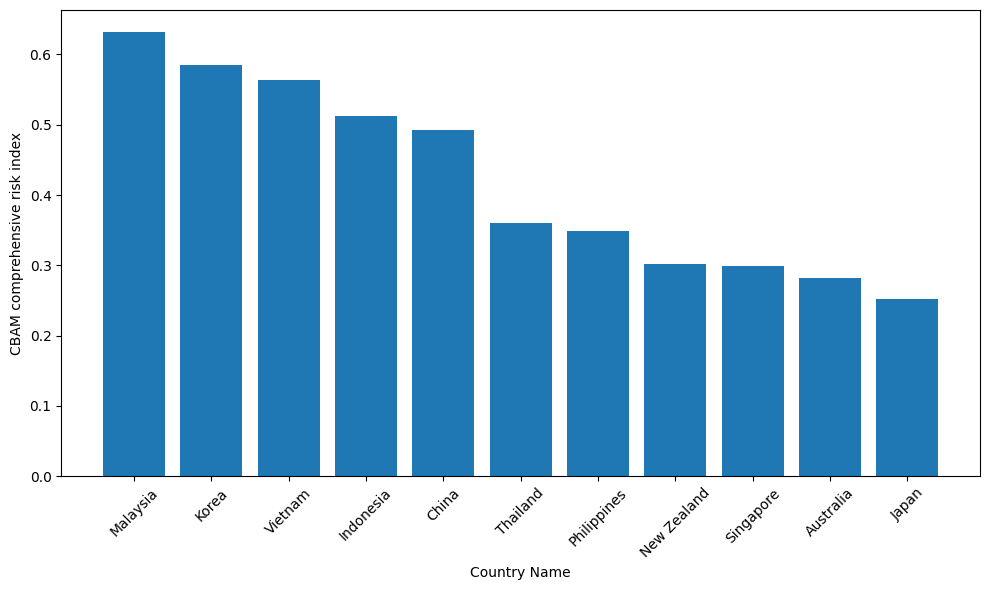

In [55]:
#Visualizziamo in un grafico il CBAM comprehensive risk index

plt.figure(figsize=(10, 6))
plt.bar(six_dim_sorted['Country Name'], six_dim_sorted['WeightedSum_1'])
plt.xlabel('Country Name')
plt.ylabel('CBAM comprehensive risk index')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Secondo l'indice di rischio relativo al CBAM, il paese più vulnerabile è la **Malaysia**, seguita dalla **Corea del Sud**. Questo è dovuto in particolare alla loro alta esposizione in termini di esportazioni nei confronti dell'Unione Europea. I paesi meno colpiti, invece, sono **Australia** e **Giappone**.

In [56]:
index_stats = six_dim_sorted['WeightedSum_1'].describe()
print(index_stats)

count    11.000000
mean      0.420913
std       0.138037
min       0.252242
25%       0.301021
50%       0.360874
75%       0.537984
max       0.631631
Name: WeightedSum_1, dtype: float64


# Sensitivity analysis

In [57]:
# Ipotizziamo di assegnare un peso del 30% alla variabile PctExpCBAM
weights_2 = {'PctExpCBAM': 0.30, 'ExpCBAMperGDP': 0.14, 'Trade_Elast': 0.14, 'Carbon_Intensity': 0.14, 'SPI_Score_Compl': 0.14, 'PatPerCap_Compl':0.14, }

# Calculate the weighted sum
six_dim['WeightedSum_2'] = six_dim.apply(lambda row: sum(row[col] * weights_2 for col, weights_2 in weights_2.items()), axis=1)

# Sort the values
six_dim_sorted_2 = six_dim.sort_values(by='WeightedSum_2', ascending=False)

# Now, df['WeightedSum_2'] contains the weighted sum for each observation
print(six_dim_sorted_2)

   Country Name Country Code  Carbon_Intensity  PctExpCBAM  ExpCBAMperGDP  \
8         Korea          KOR          0.648752    1.000000       1.000000   
2      Malaysia          MYS          0.856046    0.375534       0.766578   
0     Indonesia          IDN          1.000000    0.494126       0.203308   
3         China          CHN          0.831094    0.259560       0.233156   
9       Vietnam          VNM          0.535509    0.172111       0.655107   
5      Thailand          THA          0.775432    0.116610       0.141137   
1   Philippines          PHL          0.928983    0.000000       0.000000   
10  New Zealand          NZL          0.000000    0.296710       0.103540   
4     Australia          AUS          0.777351    0.102805       0.017466   
6     Singapore          SGP          0.750480    0.026838       0.085630   
7         Japan          JPN          0.738964    0.116878       0.053194   

    Trade_Elast  SPI_Score_Compl  PatPerCap_Compl  WeightedSum_1  \
8      

In [58]:
# Ipotizziamo di assegnare un peso uguale a tutte le variabili
weights_2 = {'PctExpCBAM': 0.166, 'ExpCBAMperGDP': 0.166, 'Trade_Elast': 0.166, 'Carbon_Intensity': 0.166, 'SPI_Score_Compl': 0.166, 'PatPerCap_Compl':0.166, }

# Calculate the weighted sum
six_dim['WeightedSum_2'] = six_dim.apply(lambda row: sum(row[col] * weights_2 for col, weights_2 in weights_2.items()), axis=1)

# Sort the values
six_dim_sorted_2 = six_dim.sort_values(by='WeightedSum_2', ascending=False)

# Now, df['WeightedSum_2'] contains the weighted sum for each observation
print(six_dim_sorted_2)

   Country Name Country Code  Carbon_Intensity  PctExpCBAM  ExpCBAMperGDP  \
2      Malaysia          MYS          0.856046    0.375534       0.766578   
0     Indonesia          IDN          1.000000    0.494126       0.203308   
9       Vietnam          VNM          0.535509    0.172111       0.655107   
3         China          CHN          0.831094    0.259560       0.233156   
8         Korea          KOR          0.648752    1.000000       1.000000   
1   Philippines          PHL          0.928983    0.000000       0.000000   
5      Thailand          THA          0.775432    0.116610       0.141137   
6     Singapore          SGP          0.750480    0.026838       0.085630   
10  New Zealand          NZL          0.000000    0.296710       0.103540   
4     Australia          AUS          0.777351    0.102805       0.017466   
7         Japan          JPN          0.738964    0.116878       0.053194   

    Trade_Elast  SPI_Score_Compl  PatPerCap_Compl  WeightedSum_1  \
2      

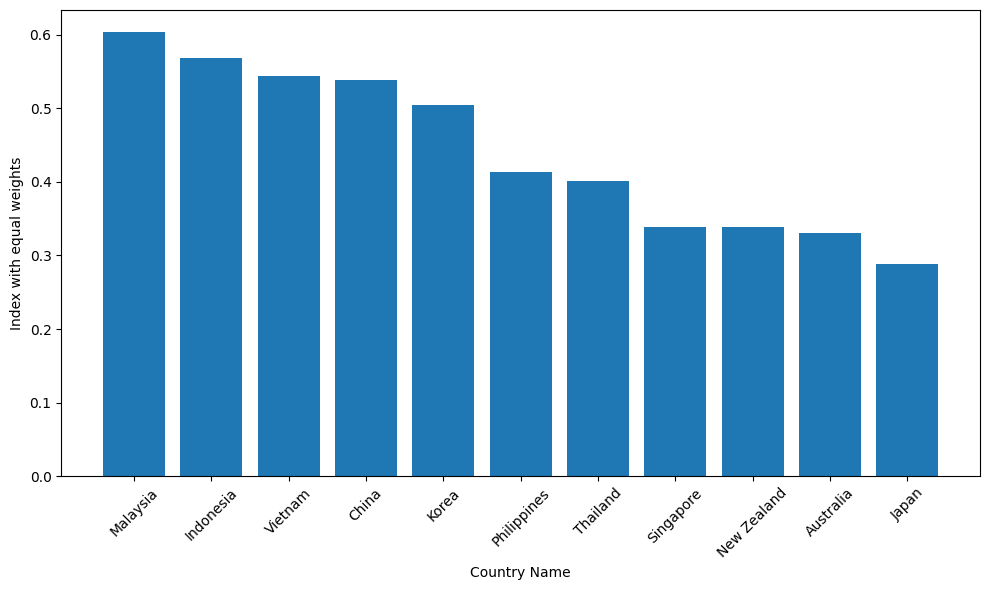

In [59]:
#Visualizziamo in un grafico

plt.figure(figsize=(10, 6))
plt.bar(six_dim_sorted_2['Country Name'], six_dim_sorted_2['WeightedSum_2'])
plt.xlabel('Country Name')
plt.ylabel('Index with equal weights')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

   Country Name Country Code  Carbon_Intensity  PctExpCBAM  ExpCBAMperGDP  \
8         Korea          KOR          0.648752    1.000000       1.000000   
2      Malaysia          MYS          0.856046    0.375534       0.766578   
9       Vietnam          VNM          0.535509    0.172111       0.655107   
0     Indonesia          IDN          1.000000    0.494126       0.203308   
3         China          CHN          0.831094    0.259560       0.233156   
7         Japan          JPN          0.738964    0.116878       0.053194   
6     Singapore          SGP          0.750480    0.026838       0.085630   
10  New Zealand          NZL          0.000000    0.296710       0.103540   
5      Thailand          THA          0.775432    0.116610       0.141137   
1   Philippines          PHL          0.928983    0.000000       0.000000   
4     Australia          AUS          0.777351    0.102805       0.017466   

    Trade_Elast  SPI_Score_Compl  PatPerCap_Compl  WeightedSum_1  \
8      

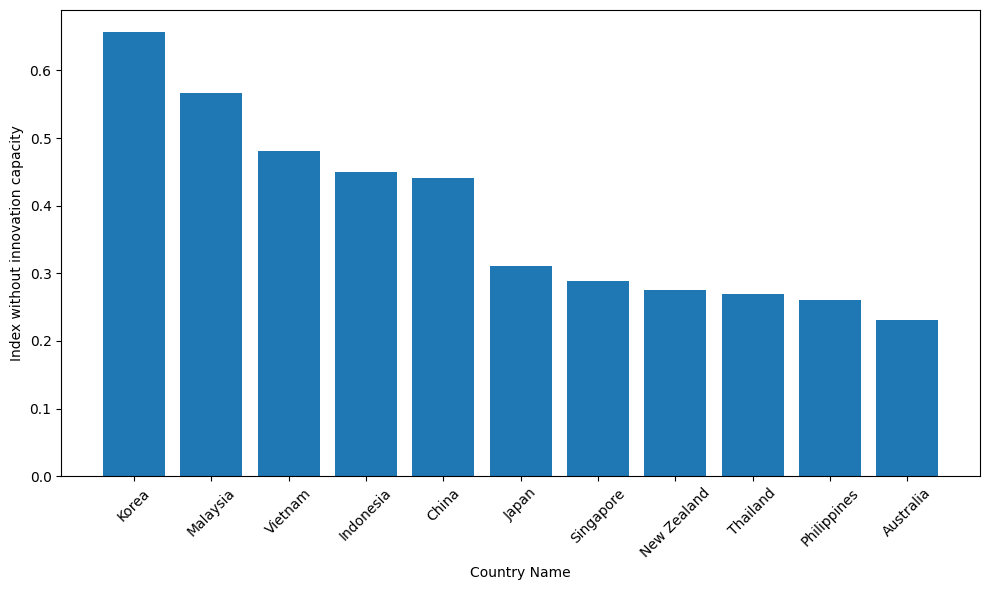

In [60]:
# Ipotizziamo di togliere l'innovation capacity
ws_no_patpercap = {'ExpCBAMperGDP': 0.30, 'PctExpCBAM': 0.175, 'Trade_Elast': 0.175, 'Carbon_Intensity': 0.175, 'SPI_Score_Compl': 0.175}

# Calculate the weighted sum
six_dim['ws_no_patpercap'] = six_dim.apply(lambda row: sum(row[col] * ws_no_patpercap for col, ws_no_patpercap in ws_no_patpercap.items()), axis=1)

# Sort the values
six_dim_sorted = six_dim.sort_values(by='ws_no_patpercap', ascending=False)

# Now, df['WeightedSum'] contains the weighted sum for each observation
print(six_dim_sorted)

#Visualizziamo in un grafico

plt.figure(figsize=(10, 6))
plt.bar(six_dim_sorted['Country Name'], six_dim_sorted['ws_no_patpercap'])
plt.xlabel('Country Name')
plt.ylabel('Index without innovation capacity')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

   Country Name Country Code  Carbon_Intensity  PctExpCBAM  ExpCBAMperGDP  \
2      Malaysia          MYS          0.856046    0.375534       0.766578   
8         Korea          KOR          0.648752    1.000000       1.000000   
0     Indonesia          IDN          1.000000    0.494126       0.203308   
9       Vietnam          VNM          0.535509    0.172111       0.655107   
3         China          CHN          0.831094    0.259560       0.233156   
5      Thailand          THA          0.775432    0.116610       0.141137   
1   Philippines          PHL          0.928983    0.000000       0.000000   
4     Australia          AUS          0.777351    0.102805       0.017466   
6     Singapore          SGP          0.750480    0.026838       0.085630   
10  New Zealand          NZL          0.000000    0.296710       0.103540   
7         Japan          JPN          0.738964    0.116878       0.053194   

    Trade_Elast  SPI_Score_Compl  PatPerCap_Compl  WeightedSum_1  \
2      

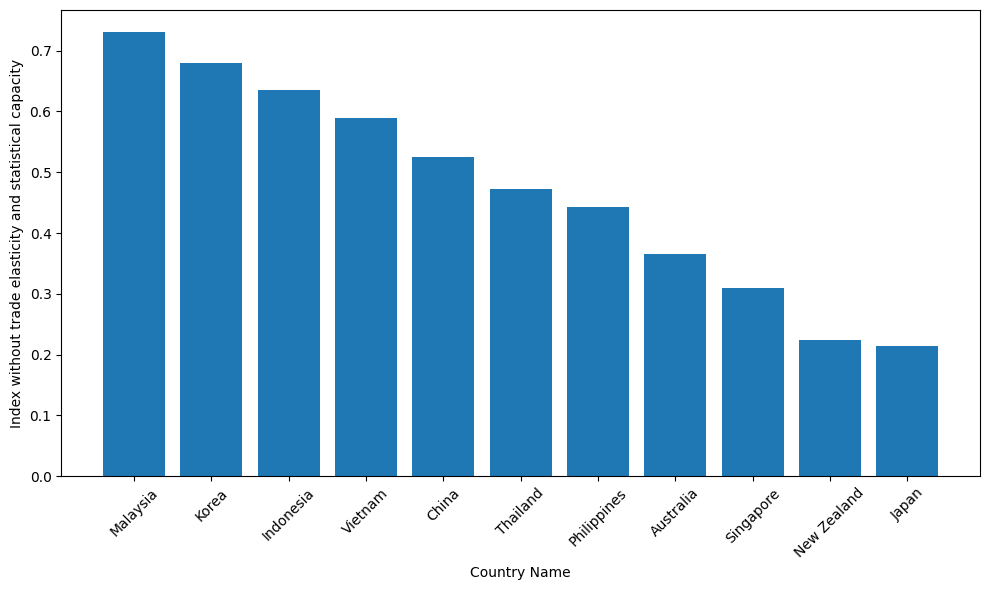

In [61]:
# Ipotizziamo di togliere la trade elasticity e la statistical capacity
ws_no_trade_stat = {'ExpCBAMperGDP': 0.30, 'PctExpCBAM': 0.23, 'Carbon_Intensity': 0.23, 'PatPerCap_Compl':0.23}

# Calculate the weighted sum
six_dim['ws_no_trade_stat'] = six_dim.apply(lambda row: sum(row[col] * ws_no_trade_stat for col, ws_no_trade_stat in ws_no_trade_stat.items()), axis=1)

# Sort the values
six_dim_sorted = six_dim.sort_values(by='ws_no_trade_stat', ascending=False)

# Now, df['WeightedSum'] contains the weighted sum for each observation
print(six_dim_sorted)

#Visualizziamo in un grafico

plt.figure(figsize=(10, 6))
plt.bar(six_dim_sorted['Country Name'], six_dim_sorted['ws_no_trade_stat'])
plt.xlabel('Country Name')
plt.ylabel('Index without trade elasticity and statistical capacity')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

   Country Name Country Code  Carbon_Intensity  PctExpCBAM  ExpCBAMperGDP  \
8         Korea          KOR          0.648752    1.000000       1.000000   
2      Malaysia          MYS          0.856046    0.375534       0.766578   
3         China          CHN          0.831094    0.259560       0.233156   
9       Vietnam          VNM          0.535509    0.172111       0.655107   
0     Indonesia          IDN          1.000000    0.494126       0.203308   
5      Thailand          THA          0.775432    0.116610       0.141137   
1   Philippines          PHL          0.928983    0.000000       0.000000   
6     Singapore          SGP          0.750480    0.026838       0.085630   
7         Japan          JPN          0.738964    0.116878       0.053194   
4     Australia          AUS          0.777351    0.102805       0.017466   
10  New Zealand          NZL          0.000000    0.296710       0.103540   

    Trade_Elast  SPI_Score_Compl  PatPerCap_Compl  WeightedSum_1  \
8      

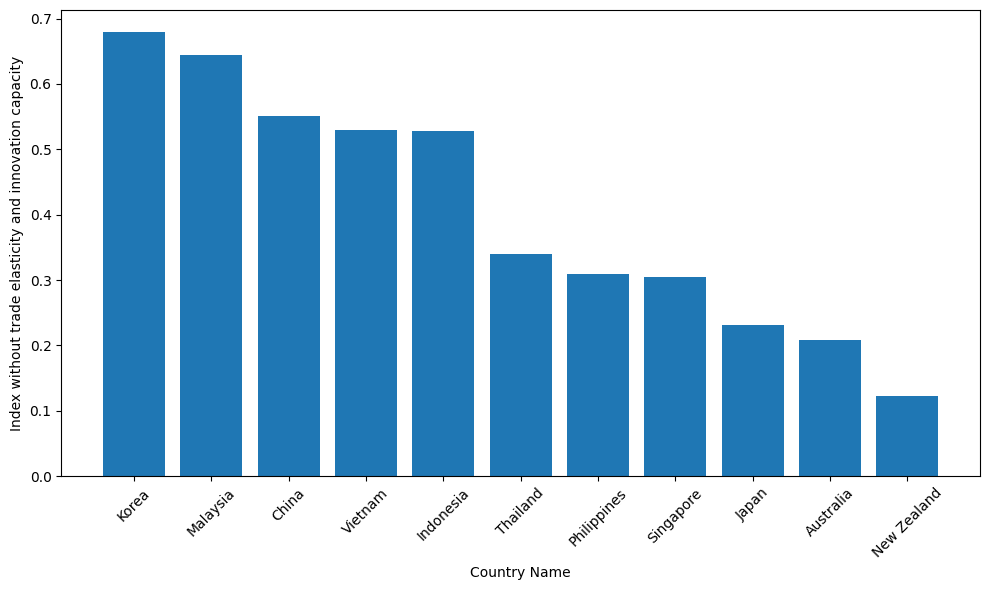

In [62]:
# Ipotizziamo di togliere la trade elasticity e la innovation capacity
ws_no_trade_inn = {'ExpCBAMperGDP': 0.30, 'PctExpCBAM': 0.23, 'Carbon_Intensity': 0.23, 'SPI_Score_Compl':0.23}

# Calculate the weighted sum
six_dim['ws_no_trade_inn'] = six_dim.apply(lambda row: sum(row[col] * ws_no_trade_inn for col, ws_no_trade_inn in ws_no_trade_inn.items()), axis=1)

# Sort the values
six_dim_sorted = six_dim.sort_values(by='ws_no_trade_inn', ascending=False)

# Now, df['WeightedSum'] contains the weighted sum for each observation
print(six_dim_sorted)

#Visualizziamo in un grafico

plt.figure(figsize=(10, 6))
plt.bar(six_dim_sorted['Country Name'], six_dim_sorted['ws_no_trade_inn'])
plt.xlabel('Country Name')
plt.ylabel('Index without trade elasticity and innovation capacity')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()